In [ ]:
import pandas as pd

In [ ]:
filler_words_df = pd.read_excel("/content/filler_words_count_all_ASR_Elyas.xlsx")
repetition_df = pd.read_excel("/content/repetition_count_all_ASR_Elyas.xlsx")
pnoun_df = pd.read_excel("/content/proper_noun_count_all_ASR_Elyas.xlsx")

In [ ]:
pnoun_df.columns

Index(['Fake_id', 'race', 'manual_medical_terms_count',
       'manual_medical_terms_list', 'manual_non_medical_terms_count',
       'manual_non_medical_terms_list', 'aws_medical_terms_count',
       'aws_medical_terms_list', 'aws_non_medical_terms_count',
       'aws_non_medical_terms_list', 'aws_med_medical_terms_count',
       'aws_med_medical_terms_list', 'aws_med_non_medical_terms_count',
       'aws_med_non_medical_terms_list', 'whisper_medical_terms_count',
       'whisper_medical_terms_list', 'whisper_non_medical_terms_count',
       'whisper_non_medical_terms_list', 'manual_pn_count', 'aws_pn_count',
       'whisper_pn_count', 'aws_med_pn_count', 'manual_pn_list', 'aws_pn_list',
       'whisper_pn_list', 'aws_med_pn_list'],
      dtype='object')

In [ ]:
asr_name = "aws_med_non_medical_terms_count"
manual_name = "manual_non_medical_terms_count"
asr_name2 = "aws_med_medical_terms_count"
manual_name2 = "manual_medical_terms_count"

df = pnoun_df

a = df[(df[asr_name] + df[asr_name2] == 0) & (df[manual_name] + df[manual_name2] == 0)]
b = df[(df[asr_name] + df[asr_name2] == df[manual_name] + df[manual_name2]) & (df[manual_name] + df[manual_name2] != 0)]
c = df[df[asr_name] + df[asr_name2] < df[manual_name] + df[manual_name2]]
d = df[df[asr_name] + df[asr_name2] > df[manual_name] + df[manual_name2]]


In [ ]:
print(len(a), len(b), len(c), len(d))
print(len(a) + len(b) + len(c) + len(d))

806 23 29 6
864


In [ ]:
def error_rate(df, df_race, manual_col, asr_col):
    total = ((df[manual_col] > 0) | (df[asr_col] > 0)).sum()
    print(total)
    manual_count = df_race[manual_col]
    asr_count = df_race[asr_col]
    errors = (manual_count - asr_count).abs() / pd.concat([manual_count, asr_count], axis=1).max(axis=1)
    errors = errors.fillna(0)
    return errors.sum() / total

In [ ]:
# df = pnoun_agg_df
df_race = df.query("race=='White'")
error_rate(df, df_race, manual_name, asr_name)


40


0.4

In [ ]:
pnon_non_medical = {
    "AWS GT" : {"Black": 0.228, "White": 0.30},
    "AWS Medical": {"Black": 0.23, "White": 0.4}
}

pnouns_medical = {
    "AWS GT" : {"Black": 0.277, "White": 0.33},
    "AWS Medical": {"Black": 0.142, "White": 0.32}
}

In [ ]:
pnoun_agg_df = pd.DataFrame()

In [ ]:
pnoun_agg_df["manual"] = pnoun_df["manual_medical_terms_count"] + pnoun_df["manual_non_medical_terms_count"]
pnoun_agg_df["gt"] =  pnoun_df["aws_medical_terms_count"] + pnoun_df["aws_non_medical_terms_count"]
pnoun_agg_df["medical"] =  pnoun_df["aws_med_medical_terms_count"] + pnoun_df["aws_med_non_medical_terms_count"]
pnoun_agg_df["race"] = pnoun_df["race"]

In [ ]:
pnoun_df.columns

Index(['Fake_id', 'race', 'manual_medical_terms_count',
       'manual_medical_terms_list', 'manual_non_medical_terms_count',
       'manual_non_medical_terms_list', 'aws_medical_terms_count',
       'aws_medical_terms_list', 'aws_non_medical_terms_count',
       'aws_non_medical_terms_list', 'aws_med_medical_terms_count',
       'aws_med_medical_terms_list', 'aws_med_non_medical_terms_count',
       'aws_med_non_medical_terms_list', 'whisper_medical_terms_count',
       'whisper_medical_terms_list', 'whisper_non_medical_terms_count',
       'whisper_non_medical_terms_list', 'manual_pn_count', 'aws_pn_count',
       'whisper_pn_count', 'aws_med_pn_count', 'manual_pn_list', 'aws_pn_list',
       'whisper_pn_list', 'aws_med_pn_list'],
      dtype='object')

Repetition:
AWS total: 0.6373389355742296


In [ ]:
groups = ["Repetition", "Filler Words", "Proper Nouns"]
repetition = {
    "AWS General" : {"Black": 0.396, "White": 0.240},
    "AWS Medical": {"Black": 0.432, "White": 0.264}
}

filler_words = {
    "AWS General" : {"Black": 0.322, "White": 0.333},
    "AWS Medical": {"Black": 0.417, "White": 0.320}
}

# pnouns = {
#     "AWS GT" : {"Black": 0.253, "White": 0.299},
#     "AWS Medical": {"Black": 0.209, "White": 0.356}
# }

pnon_non_medical = {
    "AWS General" : {"Black": 0.228, "White": 0.30},
    "AWS Medical": {"Black": 0.23, "White": 0.4}
}

pnouns_medical = {
    "AWS General" : {"Black": 0.277, "White": 0.33},
    "AWS Medical": {"Black": 0.142, "White": 0.32}
}

Text(0, 0.5, 'Error Rate')

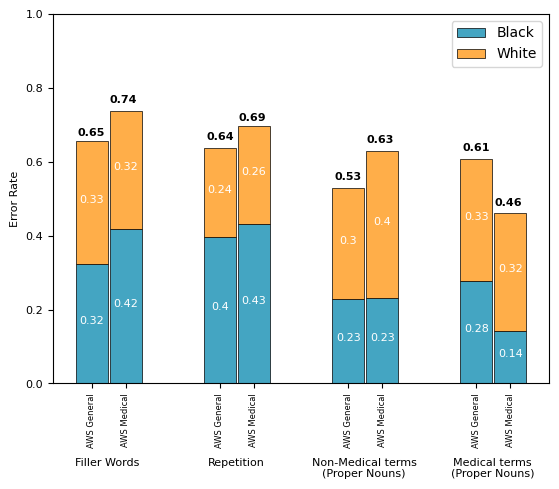

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(4)

values1 = [filler_words["AWS General"]["Black"], repetition["AWS General"]["Black"], pnon_non_medical["AWS General"]["Black"], pnouns_medical["AWS General"]["Black"]]
values2 = [filler_words["AWS General"]["White"], repetition["AWS General"]["White"], pnon_non_medical["AWS General"]["White"], pnouns_medical["AWS General"]["White"]]
values3 = [filler_words["AWS Medical"]["Black"], repetition["AWS Medical"]["Black"], pnon_non_medical["AWS Medical"]["Black"], pnouns_medical["AWS Medical"]["Black"]]
values4 = [filler_words["AWS Medical"]["White"], repetition["AWS Medical"]["White"], pnon_non_medical["AWS Medical"]["White"], pnouns_medical["AWS Medical"]["White"]]


fig, ax = plt.subplots()

# Stacked bar chart
ax.bar(X, values1, width=0.25, color="#44a5c2", edgecolor = "black", linewidth = 0.5, label="Black")
ax.bar(X, values2, bottom = values1, width=0.25, color="#ffae49", edgecolor = "black", linewidth = 0.5, label="White")
ax.bar(X+0.265, values3, width=0.25, color="#44a5c2", edgecolor = "black", linewidth = 0.5)
ax.bar(X+0.265, values4, bottom=values3, width=0.25, color="#ffae49", edgecolor = "black", linewidth = 0.5)


category_positions = X + 0.125
categories = ["Filler Words", "Repetition", "Non-Medical terms\n(Proper Nouns)", "Medical terms\n(Proper Nouns)"]
for pos, label in zip(category_positions, categories):
    # Here we slightly adjust the vertical position to accommodate the rotated primary labels
    ax.text(pos, -0.20, label, ha='center', va='top', transform=ax.get_xaxis_transform(), fontsize=8)


for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height(), 2), ha = 'center',
          color = 'w', size=8)

total_values = np.add(np.round(values1, 2), np.round(values2, 2))
for i, total in enumerate(total_values):
  ax.text(i, total + 0.02, round(total, 2),
          ha = 'center', color = 'black', size=8, weight="bold")

total_values = np.add(np.round(values3, 2), np.round(values4, 2))
for i, total in enumerate(total_values):
  ax.text(i+0.25, total + 0.02, round(total, 2),
          ha = 'center', color = 'black', size=8, weight="bold")

ax.set_ylim([0, 1])
# plt.xticks([0.125, 1.125, 2.125, 2.5, 2.75, 3], ["AWS GT", "AWS Medical"]*3, minor=True)
plt.xticks(np.array([0, 0.265, 1, 1.265, 2, 2.265, 3, 3.265]), ["AWS General", "AWS Medical"]*4, minor=False, rotation=90, fontsize=4)
ax.xaxis.remove_overlapping_locs = False

plt.legend()
_ = plt.yticks(fontsize=8)
_ = plt.xticks(fontsize=6)

ax.set_ylabel('Error Rate', fontsize=8)




# plt.show()





In [ ]:
fig.savefig("bar.jpg", bbox_inches='tight', dpi=600)